# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import io
from src.helper_functions import load_data, get_model_perfs, init_model_perfs,\
                                 save_model, save_model_perfs, check_is_best,\
                                 read_model, evaluate_model_predictions,\
                                 update_model_perfs, check_and_save,\
                                 adjusted_classes
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Show Performance of All Target Models

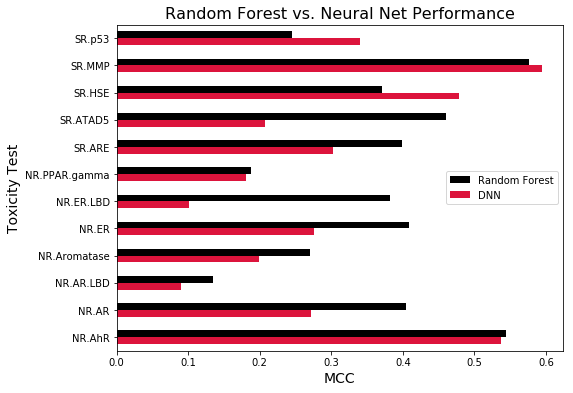

In [11]:
met = 'mcc'
def get_max_met(df):
    i = df[met].idxmax()
    return df.loc[[i]]

targets = ['NR.AhR', 'NR.AR', 'NR.AR.LBD', 'NR.Aromatase', 'NR.ER', 'NR.ER.LBD',
           'NR.PPAR.gamma', 'SR.ARE', 'SR.ATAD5', 'SR.HSE', 'SR.MMP', 'SR.p53']
use_base_RF = False
rf = None
for target in targets:
    df = get_model_perfs(target)
    df['Target']=target
    if rf is None:
        rf = df.iloc[:1,] if use_base_RF else get_max_met(df.iloc[:2,])
    else:
        rf = rf.append(df.iloc[:1,],ignore_index=True) if use_base_RF else \
                            rf.append(get_max_met(df.iloc[:2,]),ignore_index=True)
rf = rf[[met,'Target']].set_index('Target').rename(columns={met:'Random Forest'})
dnn = None
for target in targets:
    df = get_model_perfs(target)
    df['Target']=target
    if dnn is None:
        dnn = get_max_met(df.iloc[2:,])
    else:
        dnn = dnn.append(get_max_met(df.iloc[2:,]),ignore_index=True)
dnn = dnn[[met,'Target']].set_index('Target').rename(columns={met:'DNN'})
# sdf = sdf[['model','f1','target']].set_index('target')
rf['DNN'] = dnn['DNN']

ax = rf[['DNN','Random Forest']].plot.barh(figsize=[8,8*4.8/6.4],color=('crimson','k'))
fig = ax.get_figure()
ax.set_xlabel(met.upper(),fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
ax.set_ylabel('Toxicity Test',fontsize=14)
ax.set_title('Random Forest vs. Neural Net Performance',fontsize=16);
fig.savefig('./reports/figures/overall_performance.svg',\
            format='svg', dpi=1200, transparent=True, bbox_inches = "tight");